## COMP5721M: Programming for Data Science 

## Group project (Coursework 2): Data Analysis Project


# Analysing mental health in the tech industry


_Give names and emails of group members here:_

* Stephen McGuinness, zmmh2430@leeds.ac.uk
* Yuchen Sun, xvws5109@leeds.ac.uk
* Xiao Tan, rdjl5698@leeds.ac.uk
* Yuanlin Zhou, psvh7734@leeds.ac.uk

# Project Plan

## The Data

### Data Description

The dataset was collected from [Kaggle](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data) and attributed to a non-profit organisation named OSMI (Open Source Mental Health). The data itself is a tech survey from 2014 on mental health. There are 27 columns and 1260 responses. The type of data captured include demographics (age, gender, country), employment type (self-employed, company size), time stamps and information on workplace mental health resources (benefits, wellness programs, leave policies).

### Accuracy and Reliability

The organisation's history in sampling relies on individuals self-reporting their experiences through an an online tech-survey held on their website. Security mechanisms to verify whether these individuals do work in the tech sector is nonexistant. Regardless of this fault, self-reported surveys, in general, introduce several biasis, e.g. sampling bias, language ambiguity and culture and language differences. 

-   **Sampling Bias**: The survey was freely available on their website for the public to self-report. This means, individuals with a pre-existing interest in mental health are likely to report on past experiences or are currently experiencing said conditions (Bauhoff, 2023).

- **Cultural differences**: The survey was global with repondents located in 48 unique countries. Each culture may attribute a different meaning on what constitutes as mental health support, benefits or wellness programs. This could potentially lead to a question on the survey being misunderstood, e.g. Has your employer ever discussed mental health as part of an employee wellness program? could mean formal presentations or seminars or informal discussions (globalEdge, 2018).

In addition to this, the lack of security mechanism does introduce the possibility of the risk of false responses where individuals may intentionally skew results in favour for particular outcome. It, therefore, important to recognise these limitations will affect the data's integrity while dicussing and analysing this dataset. 

### Data Quality and Usability

Kaggle provided this dataset with an 8.82 usability score out of 10. The aim of these scores is indicate the clarity, completeness and regularity of updates of datasets in their platform (Cher, 2024). The data itself contains numerous missing values, e.g. the ```self_employed``` column lacks 18 values and ```work_inteference``` column lacks 264 missing values. In addition, the ```age``` column contained erroneous results with a min age -1726 and a max age indicating 99999999999 both of which will be removed in the ```data cleaning``` stage. Despite these issues, the dataset’s structured format and diverse variables make it suitable for exploratory analysis and predictive modeling.


## Project Aim and Objectives

The project aims to analyse mental health awareness and support in the tech industry across varied organisation sizes, e.g. small, medium and large via a limited but comprehensive sample set. By examining the responses on specific rows, such as mental health treatment plan, family history, company-provided benefits along with work place dynamics - the study seeks to identify how company size and demographic factors influence whether an employee feels comfort in discussing their mental health. These insights may aid in informing workplace policies by reducing stigma or through promoting support systems in tech environments. 

- Objective 1 (Yuchen Sun): Clean and process the data sample set, adressing missing values, inconsistencies in column specific areas, e.g. gender and age.

- Objective 2 (Xiao Tan): Identify and visualize trends on mental health openness along with support across various company sizes, focusing on whether these trends differ by age, gender or by company type. 

- Objective 3 (Yuanlin Zhou): Encode data and scale feature. Train and evaluate classification models, e.g. Decision Tree and KNN - to predict whether an employee are likely to seek mental health treatment based on specific features. The evaluation stage involves analysing the model's accuracy, recall, and precision to determine its effectiveness.

- Objective 4 (Stephen McGuinness): Report writing duties, e.g. discussing data reliability, accuracy, creating objectives for individuals. Ensuring version control, e.g. reverting a commit, rebasing if necessary and merging branches into the main branch when necessary. In addition to this, to create an intuitive GUI (Graphical User interface) where individuals can input data on their notebook to receive predictions on whether an individual requires treatment on not - based on the model analysis. 




## System Design


### Architecture
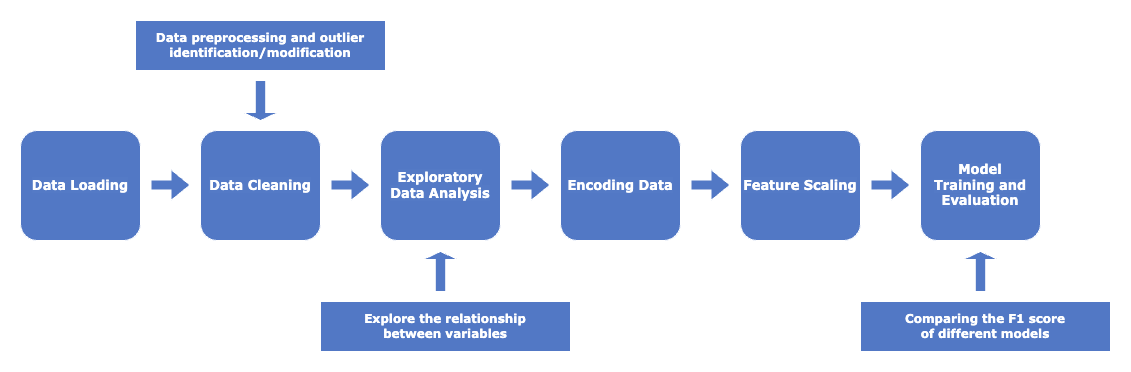


The overall architecture of data processing is shown in the figure. The process begins with importing the data and identifying and addressing outliers. Next, we performed exploratory data analysis (EDA) by visualizing data features using bar charts, pie charts, and histograms to gain insights. Afterward, we encoded the data and scaled the age feature to meet the requirements for training the model. In the model training and evaluation phase, we used a random forest model to assess feature importance, selected features based on the evaluation results and insights from the EDA. Then we trained machine learning models, such as decision tree and k-nearest neighbor. Finally, we evaluated models based on F1 scores and predicted results by trained model. Visualization of the results at each stage is integrated throughout the process, with the visualizations encapsulated in functions for easy reuse.


### Processing Modules and Algorithms

- Data Cleaning: Fill missing values in "self_employed" and "state" columns with "Unknown" using Pandas.
- Encoding Data: Use LabelEncoder from sklearn.preprocessing to convert categorical values into numeric values for model compatibility.
- Feature Selection: Using Random Forest model to evaluate the importance of features.
- Model Training and Evaluation: Create machine learning models, such as decision trees, k-nearest neighbors, and SVC, and evaluate their performance using the F1 score.


# Program Code

In [292]:
# Import modules

# data processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, HTML


# encoding data and scaling
from sklearn.preprocessing import LabelEncoder # encoding data
from sklearn.preprocessing import MinMaxScaler # scaling

# model training
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, make_scorer, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# color dictionary
color_dict = {
    'Yes': '#88B04B', 
    'No': '#D64550', 
    'Sometimes': '#E2B659', 
    'Never': '#B6D7A8', 
    'Rarely': '#F5A9B8', 
    'Often': '#D99A6C', 
    "Don't know": '#6D9DC5', 
    'Unknown': '#A4C3D9' 
}

We use pandas to describe and analyze data, matplotlib and seaborn to visualize data, and sklearn for feature selection and data modeling.

## 1. Data Loading

In [293]:
# Loading the dataset
def get_original_data():
    file = './input/survey.csv'
    df = pd.read_csv(file)
    return df

df = get_original_data()

# The num of rows and columns of dataset
print("Data Shape:", df.shape)

# The type of columns
print(df.info())

Data Shape: (1259, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null

## 2. Data Cleaning

In [294]:
# Remove unused columns

if 'Country' in df.columns:
    distinct_countries = df['Country'].unique()
    print(f"Distinct countries: {distinct_countries}")
    print(f"Number of distinct countries: {len(distinct_countries)}")
else:
    print("Column 'Country' not found in the DataFrame.")
#df = df.drop(['Timestamp','Country','state','comments'], axis = 1)
df.head(5)

Distinct countries: ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Philippines']
Number of distinct countries: 48


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [295]:
# Check for null values in each column
columnStr = 'column'
mcStr = 'missing count'
print(f"{columnStr:<25} {mcStr}")

for col in df:
    missing_count = df[col].isnull().sum()
    print(f"{col:<30} {missing_count}")

column                    missing count
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                          515
self_employed                  18
family_history                 0
treatment                      0
work_interfere                 264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                       1095


In [296]:
# Assign all empty values to 'NaN'
df['self_employed'] = df['self_employed'].fillna('NaN')
df['work_interfere'] = df['work_interfere'].fillna('NaN')
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [297]:
# Replace 'NaN' in 'self_employed' column
print(df['self_employed'].value_counts(), "\n")
df['self_employed'] = df['self_employed'].replace(['NaN'], 'No')

self_employed
No     1095
Yes     146
NaN      18
Name: count, dtype: int64 



In [298]:
# Replace 'NaN' in 'work_interfere' column
print(df['work_interfere'].value_counts())
df['work_interfere'] = df['work_interfere'].replace('NaN', 'Unknown')

work_interfere
Sometimes    465
NaN          264
Never        213
Rarely       173
Often        144
Name: count, dtype: int64


In [299]:
# Clean gender
def clean_gender(gender):
    gender = str(gender).strip().lower()
    if gender in ['male', 'm', 'man', 'cis male', 'male (cis)', 'cis man', 'Guy']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'cis female', 'female (cis)', 'cis woman']:
        return 'Female'
    elif 'trans' in gender and 'male' in gender:
        return 'transMale'
    elif 'trans' in gender and 'female' in gender:
        return 'transFemale'
    elif gender in ['non-binary', 'nonbinary', 'nb', 'genderqueer', 'gender fluid']:
        return 'Other'
    else:
        return 'Other' 

df['Gender'] = df['Gender'].apply(clean_gender)
print(df['Gender'].value_counts())

Gender
Male         981
Female       244
Other         31
transMale      3
Name: count, dtype: int64


In [300]:
# Clean age
print("min age", df['Age'].min())
print("max age", df['Age'].max())

age_series = pd.Series(df['Age'])
age_median = age_series.median()
age_series[age_series <= 18] = age_median
age_series[age_series >= 100] = age_median
df['Age'] = age_series

print("min age", df['Age'].min())
print("max age", df['Age'].max())

min age -1726
max age 99999999999
min age 19
max age 72


## 3. Exploratory Data Analysis

Generates a bar chart of gender distribution in the dataset.

In [301]:
def visualize_gender_distribution(df):
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x='Gender', order=['Male', 'Female', 'transMale', 'transFemale', 'Other'])
    plt.title("Gender Distribution After Cleaning")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()

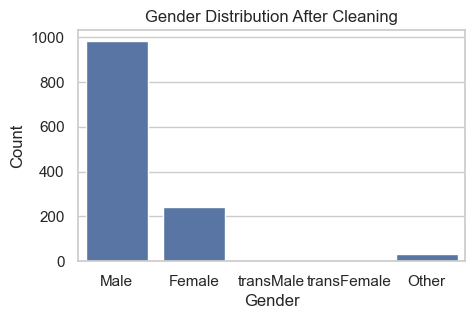

In [302]:
visualize_gender_distribution(df)

This chart illustrates the distribution of different genders in the cleaned dataset. 

Plots a histogram of the age distribution.

In [303]:
def visualize_age_distribution(df):
    sns.set(style="whitegrid")
    plt.figure(figsize=(7, 3.5))
    sns.histplot(df['Age'], kde=True, bins=30)
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

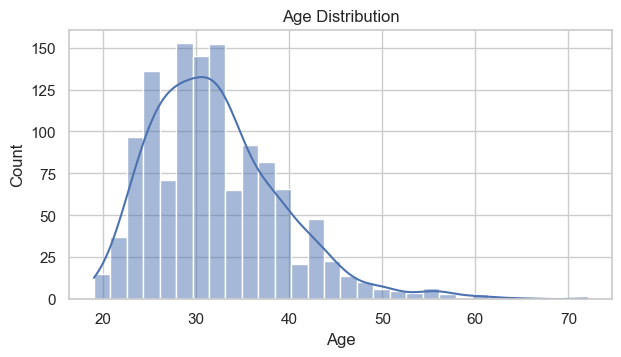

In [304]:
visualize_age_distribution(df)

The graph depicts the age distribution in the dataset. 

Plots pie charts of the relationship between gender and sought treatment.

In [305]:
def visualize_pie_charts_by_gender(df, color_dict):
    gender_categories = ['Male', 'Female', 'transMale', 'Other']
    t_df = df[df['Gender'].isin(gender_categories)]
    plt.figure(figsize=(9, 5))
    for i, gender in enumerate(gender_categories, 1):
        plt.subplot(2, 3, i)
        treatment_counts = t_df[t_df['Gender'] == gender]['treatment'].value_counts()
        colors = [color_dict[label] for label in treatment_counts.index]
        plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title(f"Mental Health Treatment - {gender}")
    plt.tight_layout()
    plt.show()

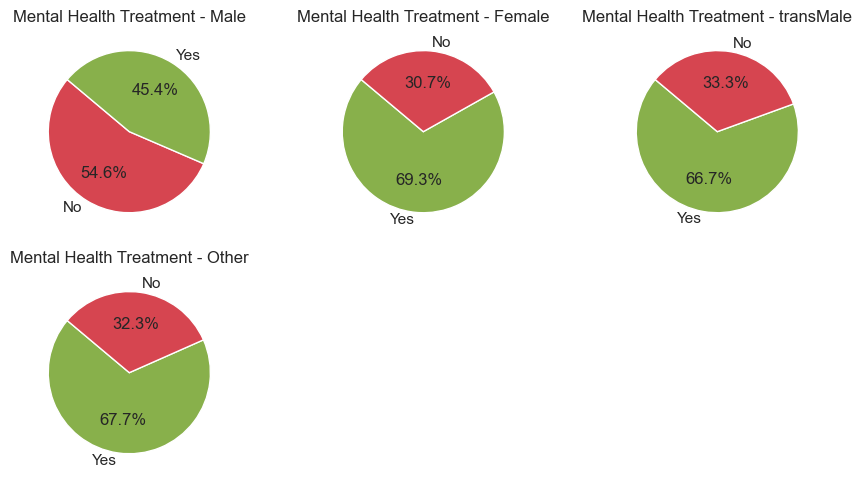

In [306]:
visualize_pie_charts_by_gender(df, color_dict)

This set of pie charts shows the proportion of people in different gender groups seeking mental health treatment.

Plots pie charts of the relationship between gender and work interference.

In [307]:
def visualize_work_interference(df, color_dict):
    plt.figure(figsize=(10, 6))
    gender_categories = ['Male', 'Female', 'transMale', 'Other']
    for i, gender in enumerate(gender_categories, 1):
        plt.subplot(2, 3, i)
        interfere_counts = df[df['Gender'] == gender]['work_interfere'].value_counts()
        colors = [color_dict[label] for label in interfere_counts.index]
        plt.pie(interfere_counts, labels=interfere_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title(f"Work Interference - {gender}")
    plt.tight_layout()
    plt.show()

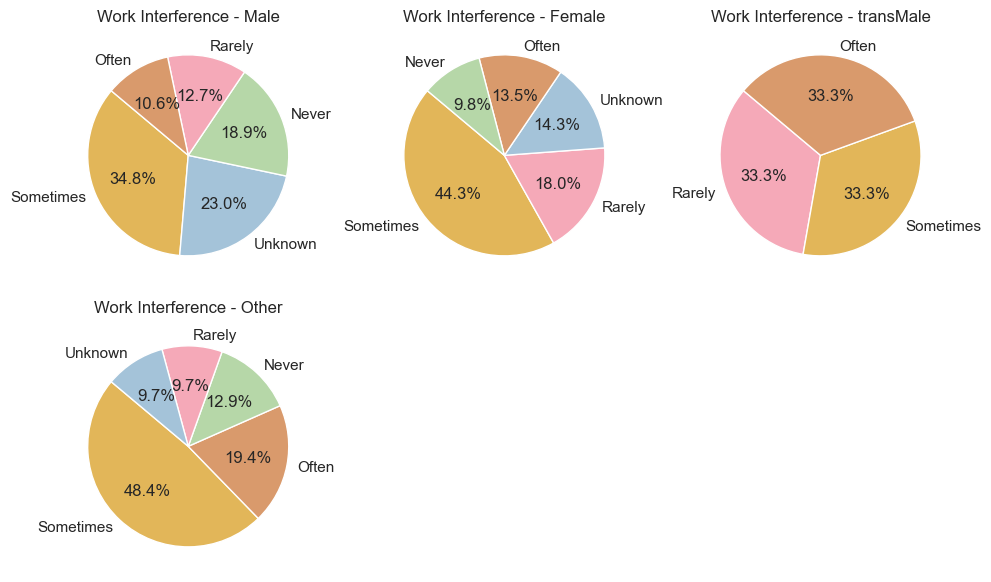

In [308]:
visualize_work_interference(df, color_dict)

This set of pie charts reveals differences between genders in how mental health problems interfere with work.

Divides the age data into age groups by predefined intervals and defines the order in which the company size is categorized.

In [309]:
# Define the boundaries of age groups
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']

# Group the age column 'Age' by the defined boundaries and store the results in a new column 'age_group'
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Define the boundaries of company size
employee_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

Shows the distribution of the proportion of work interfered with by mental health in different age groups by stacking bars.

In [310]:
def visualize_age_group_distribution(df, bins, labels, color_dict):    
    age_group_counts = df.groupby(['age_group', 'work_interfere'], observed=False).size().unstack(fill_value=0)
    age_group_totals = age_group_counts.sum(axis=1)
    age_group_percentages = age_group_counts.div(age_group_totals, axis=0) 
    age_group_percentages.plot(kind='bar', stacked=True, figsize=(8, 5), color=[color_dict[label] for label in age_group_counts.columns])
    plt.title("Work Interference by Age Group (Proportion)", fontsize=14)
    plt.xlabel("Age Group", fontsize=12)
    plt.ylabel("Proportion", fontsize=12)
    plt.legend(title="Work Interference", loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=0) 
    plt.tight_layout()
    plt.show()

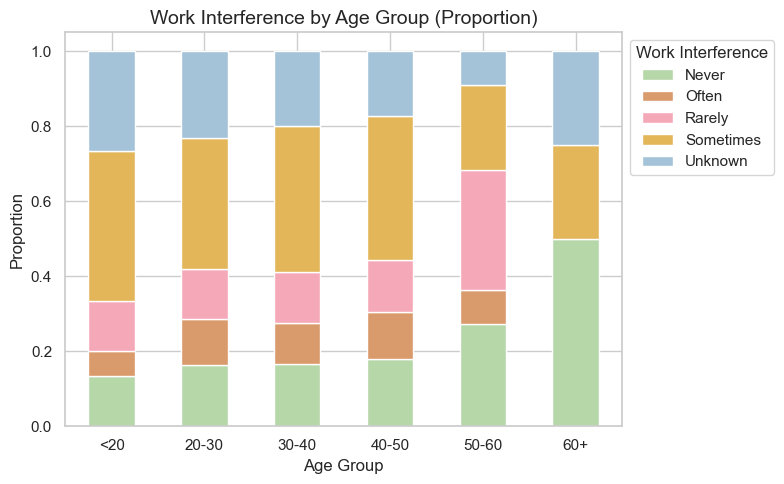

In [311]:
visualize_age_group_distribution(df, bins, labels, color_dict)

This stacked bar chart shows the percentage of people with different frequency of work interference in different age groups.

Shows the relationship between different company sizes and the provision of mental health benefits through a set of pie charts.

In [312]:
def visualize_company_size_vs_benefits(df, employee_order, color_dict):
    fig, axes = plt.subplots(2, 3, figsize=(9, 5))
    fig.suptitle("Mental Health Benefits by Company Size")
    for i, size in enumerate(employee_order):
        data_size = df[df['no_employees'] == size]
        benefit_counts = data_size['benefits'].value_counts()
        colors = [color_dict[label] for label in benefit_counts.index]
        ax = axes[i // 3, i % 3]
        ax.pie(benefit_counts, labels=benefit_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
        ax.set_title(f"Company Size: {size}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

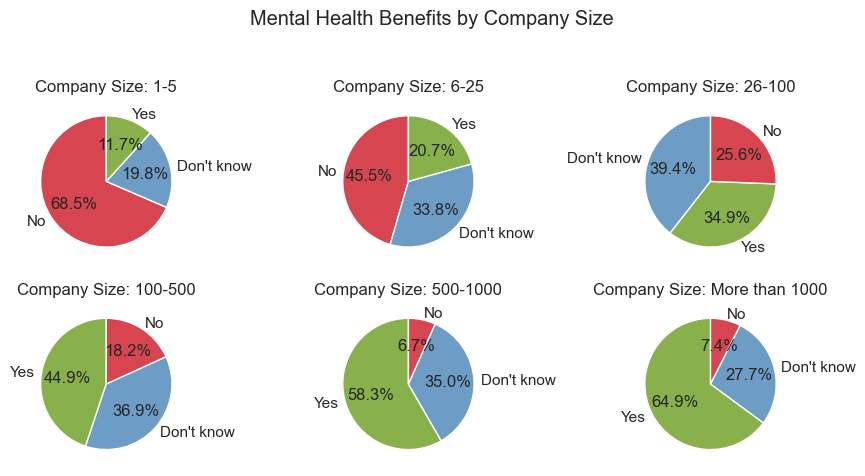

In [313]:
visualize_company_size_vs_benefits(df, employee_order, color_dict)

This set of pie charts shows the distribution of responses from employees at companies of different sizes about whether their employer offers mental health benefits. 

Shows the relationship between having a family mental health history and sought mental health treatment by grouping bars.

In [314]:
def visualize_family_history_vs_treatment(df, color_dict):
    plt.figure(figsize=(6, 3))
    colors = [color_dict.get(label) for label in ['Yes', 'No']]
    sns.countplot(data=df, x='family_history', hue='treatment', palette=colors)
    plt.title("Family History vs. Mental Health Treatment")
    plt.xlabel("Family History")
    plt.ylabel("Count")
    plt.show()

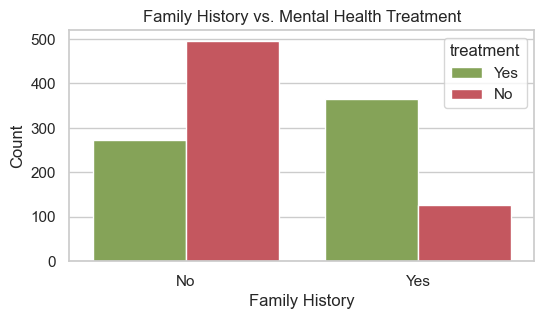

In [315]:
visualize_family_history_vs_treatment(df, color_dict)

This bar graph illustrates the impact of having a family history of mental health problems on seeking mental health treatment. 

Shows the percentage distribution of whether different company types offer mental health benefits by stacking percentage bars.

In [316]:
def visualize_tech_vs_benefits(df, color_dict):
    benefit_counts = df.groupby(['tech_company', 'benefits']).size().unstack(fill_value=0)
    benefit_percentages = benefit_counts.div(benefit_counts.sum(axis=1), axis=0)
    colors = [color_dict[label] for label in benefit_counts.index]
    benefit_percentages.plot(kind='bar', stacked=True, figsize=(8, 4), 
                             color=[color_dict[label] for label in ["Don't know", "No", "Yes"]])
    plt.title("Tech Company vs. Access to Mental Health Benefits (Proportion)", fontsize=14)
    plt.xlabel("Tech Company", fontsize=12)
    plt.ylabel("Proportion", fontsize=12)
    plt.xticks(rotation=0) 
    plt.legend(title="Benefits", loc='upper right')
    plt.tight_layout()
    plt.show()

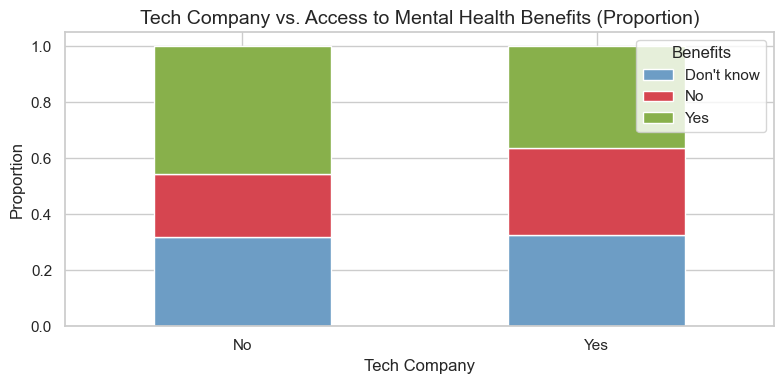

In [317]:
visualize_tech_vs_benefits(df, color_dict)

This stacked percentage bar chart demonstrates that a higher percentage of tech companies offer mental health benefits compared to non-tech companies. 

## 4. Encoding Data

In [318]:
# Create a copy of cleaned dataset
train_df = df.copy()
# Store the mapping between column value and encoded data
encoded_value_mapping = {}

for col in train_df:
    label_encoder = LabelEncoder()
    label_encoder.fit(train_df[col])
    # Assgin encoded data to df
    train_df[col] = label_encoder.transform(train_df[col])
    encoded_value_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

train_df.head(5)
for k, v in encoded_value_mapping.items():
    print(k, v)

Timestamp {'2014-08-27 11:29:31': 0, '2014-08-27 11:29:37': 1, '2014-08-27 11:29:44': 2, '2014-08-27 11:29:46': 3, '2014-08-27 11:30:22': 4, '2014-08-27 11:31:22': 5, '2014-08-27 11:31:50': 6, '2014-08-27 11:32:05': 7, '2014-08-27 11:32:39': 8, '2014-08-27 11:32:43': 9, '2014-08-27 11:32:44': 10, '2014-08-27 11:32:49': 11, '2014-08-27 11:33:23': 12, '2014-08-27 11:33:26': 13, '2014-08-27 11:33:57': 14, '2014-08-27 11:34:00': 15, '2014-08-27 11:34:20': 16, '2014-08-27 11:34:37': 17, '2014-08-27 11:34:53': 18, '2014-08-27 11:35:08': 19, '2014-08-27 11:35:12': 20, '2014-08-27 11:35:24': 21, '2014-08-27 11:35:48': 22, '2014-08-27 11:36:24': 23, '2014-08-27 11:36:48': 24, '2014-08-27 11:37:08': 25, '2014-08-27 11:37:23': 26, '2014-08-27 11:37:59': 27, '2014-08-27 11:38:12': 28, '2014-08-27 11:38:18': 29, '2014-08-27 11:38:55': 30, '2014-08-27 11:39:03': 31, '2014-08-27 11:39:31': 32, '2014-08-27 11:39:36': 33, '2014-08-27 11:40:51': 34, '2014-08-27 11:41:17': 35, '2014-08-27 11:41:37': 36, 

## 5. Feature Scaling

Age is different from other columns, needs to be scaled.

In [319]:
scaler = MinMaxScaler()

# scaling Age
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_group
0,0,0.418605,0,45,10,0,0,1,1,4,...,1,1,1,2,1,0,2,0,160,1
1,1,0.581395,1,45,11,0,0,0,2,5,...,0,1,0,0,1,1,0,0,160,2
2,2,0.302326,1,7,45,0,0,0,2,4,...,1,1,2,2,2,2,1,0,160,1
3,3,0.279070,1,44,45,0,1,1,1,2,...,2,2,1,0,0,0,1,1,160,1
4,4,0.279070,1,45,37,0,0,0,0,1,...,1,1,1,2,2,2,0,0,160,1


## 6.Model Training and Evaluation

### Feature Selection

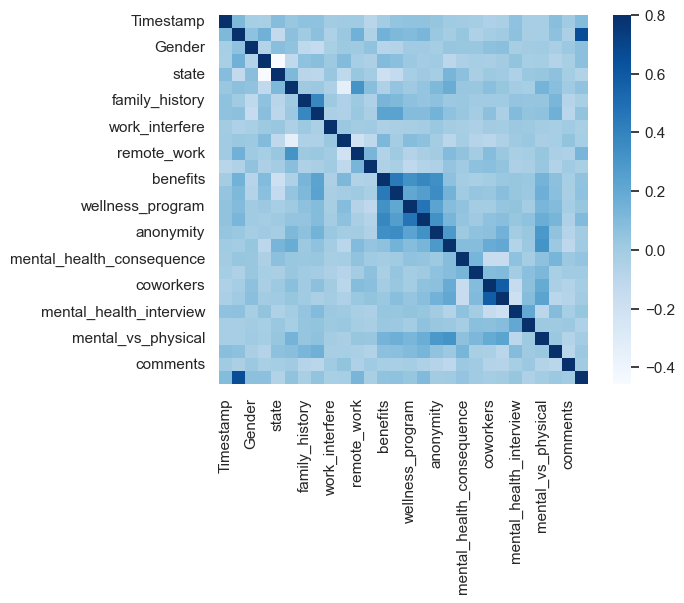

In [320]:
def visualize_coefficient_matrix():
    # Correlation Coefficient Matrix
    corrmat = train_df.corr()
    # Draw a heat map
    sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues");
    plt.show()
visualize_coefficient_matrix()

Heatmap shows the correlation between different variables.

Then, Use random forest model to evaluate feature importance.

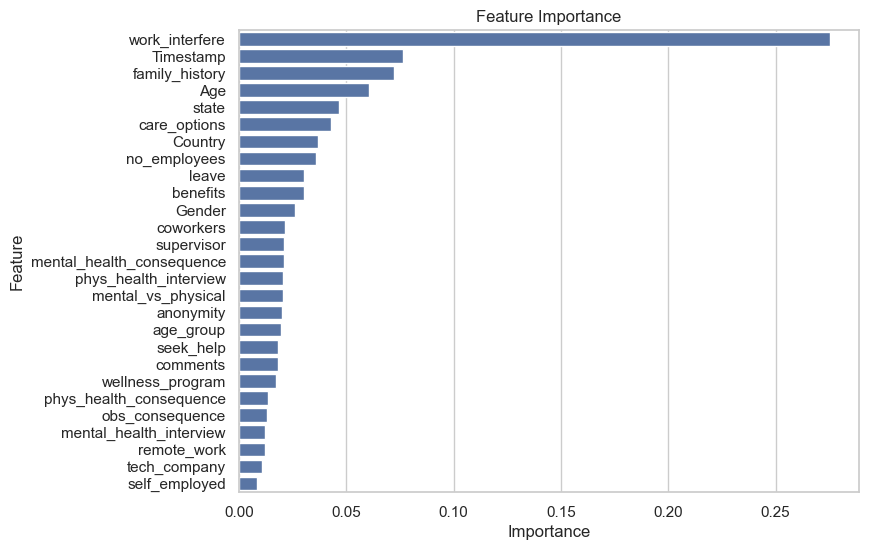

In [321]:
X = train_df.drop('treatment', axis=1)
y = train_df['treatment']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

def visualize_feature_importance():
    # Train random forest model
    rf_model = RandomForestClassifier(random_state=88)
    rf_model.fit(X_train, y_train)
    
    # Evaluate feature importance
    importances = rf_model.feature_importances_
    
    # Create DataFrame
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Visualize feature importance
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.show()

visualize_feature_importance()

Select features based on feature importance.

In [322]:
# Select features
X = train_df[['work_interfere', 'family_history', 'care_options', 'Age', 'no_employees', 'leave', 'benefits', 'Gender']]
y = train_df[['treatment']].values.ravel()
X

,work_interfere,family_history,care_options,Age,no_employees,leave,benefits,Gender
0,1,0,1,0.418605,4,2,2,0
1,2,0,0,0.581395,5,0,0,1
2,2,0,0,0.302326,4,1,1,1
3,1,1,2,0.279070,2,1,1,1
4,0,0,0,0.279070,1,0,2,1
...,...,...,...,...,...,...,...,...
1254,4,0,0,0.162791,2,2,1,1
1255,1,1,2,0.302326,2,1,2,1
1256,3,1,2,0.348837,5,1,2,1
1257,4,0,2,0.627907,1,0,1,0


### Model Evaluation

The treatment column has only two values, 0 and 1, thus we use decision trees, knn, and other machine learning models suitable for binary classification models.

In [323]:
# Models need to be evaluated
models = {
    # "Decision Tree" : DecisionTreeClassifier(min_samples_split=20, max_features=8, min_samples_leaf=20, max_depth=6, min_impurity_decrease=0.01),
    "Decision Tree" : DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=5, max_depth=10, min_impurity_decrease=0.005),
    "KNN" : KNeighborsClassifier(n_neighbors=17),
    "Logistic Regression": LogisticRegression(),
    "SVC" : SVC(kernel='rbf', random_state=88)
}

# Store model name -> model accuracy 
model_score = {}

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Feature standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_models(X, y):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        # Use cross validation to reduce the risk of overfitting
        f1 = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(f1_score)).mean()
        model_score[model_name] = f1
        print("Build", model_name, "model success!")

Evaluate all models.

In [324]:
evaluate_models(X, y)
for model_name, score in model_score.items():
    print(model_name, score)

Build Decision Tree model success!
Build KNN model success!
Build Logistic Regression model success!
Build SVC model success!
Decision Tree 0.8518480676129603
KNN 0.7379854843989142
Logistic Regression 0.68329658623524
SVC 0.8041182566652868


The Decision Tree model achieved an F1 score of 0.8518, demonstrating strong performance in balancing precision and recall. The SVC model's F1 score was 0.8041, slightly lower than that of the Decision Tree. Both the KNN and Logistic Regression models had F1 scores below 0.75, indicating weaker performance for the current task.

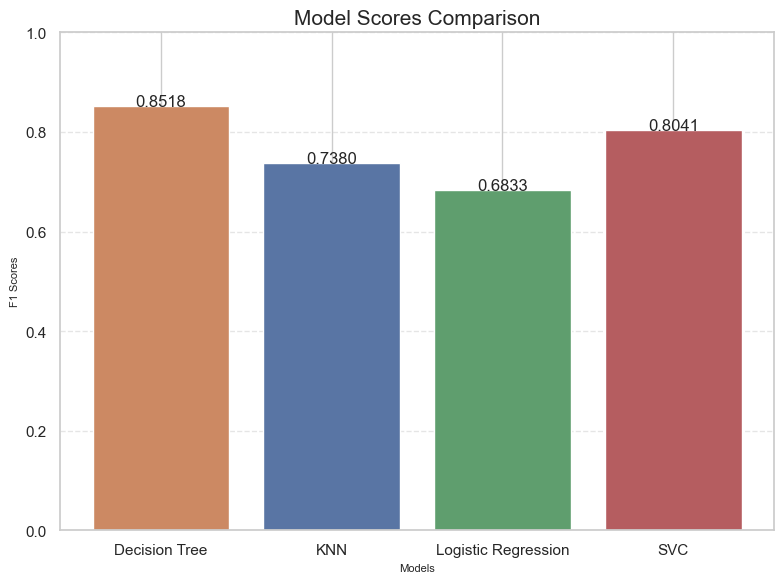

In [325]:
# Visualizing model scores.
def visualize_model_scores():
    model_names = list(model_score.keys())
    scores = list(model_score.values())
    
    # Create a bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(model_names, scores, color=['#CC8963','#5975A4','#5F9E6E','#B55D60','#F3EDCD'])
    plt.title('Model Scores Comparison', fontsize=15)
    plt.xlabel('Models', fontsize=8)
    plt.ylabel('F1 Scores', fontsize=8)
    plt.ylim(0, 1)
    
    # Add value labels to columns
    for i, score in enumerate(scores):
        plt.text(i, score, f'{score:.4f}', ha='center', fontsize=12)
    
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

visualize_model_scores()

Visualize Decision Tree.

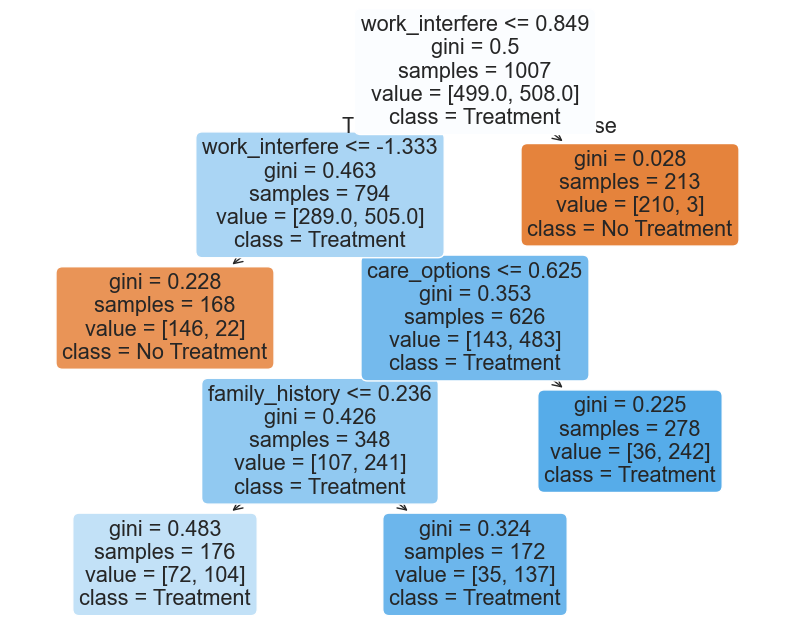

In [326]:
def visualize_decision_tree():
    plt.figure(figsize=(10, 8))
    # Get decision tree model
    decision_tree_model = models['Decision Tree']
    plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=['No Treatment', 'Treatment'], rounded=True)
    plt.show()
    
visualize_decision_tree()

Recall = 0.93 indicates that the model has a strong ability to identify people who need mental treatment. Precision = 0.77 indicates that the model has some false positives. Accuracy = 0.82 is an above-average result, indicating the classification ability of model is strong overall.

In [327]:
decision_tree_model = models['Decision Tree']
# Predicting the result
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.82
Precision: 0.77
Recall: 0.93


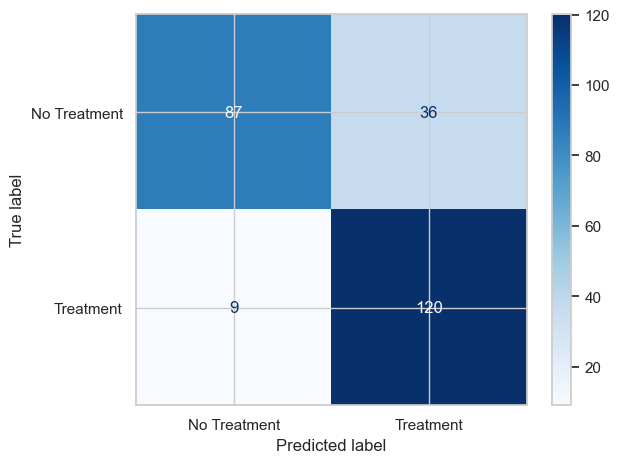

In [328]:
def visualize_confusing_matrix():
    # Create a confusing matrix
    cfsn_matrix = confusion_matrix(y_test, y_pred, labels=decision_tree_model.classes_)
    cfsn_display = ConfusionMatrixDisplay(confusion_matrix=cfsn_matrix, display_labels=['No Treatment', 'Treatment'])
    cfsn_display.plot(cmap='Blues')
    plt.tight_layout()
    plt.show()

visualize_confusing_matrix()

The confusing matrix displays the model's predictions on the test set compared to the actual labels.

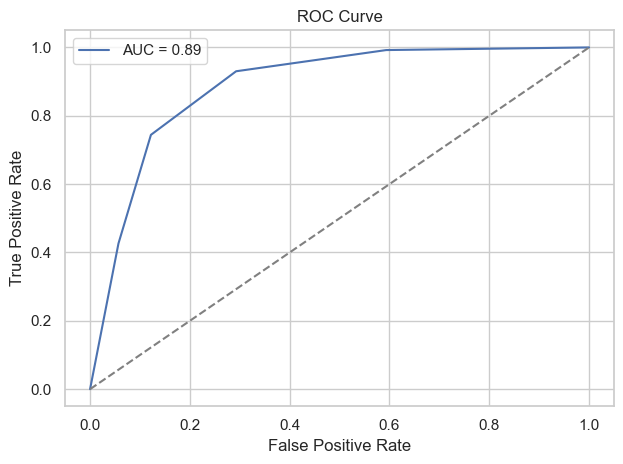

In [329]:
def visualize_roc_curve():
    # Use the trained decision tree model to predict the probability 
    # that the test set sample belongs to the positive class
    y_pred_proba = decision_tree_model.predict_proba(X_test)[:, 1]
    # True Positive Rate (TPR) and False Positive Rate (FPR)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Draw roc curve
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.tight_layout()
    plt.show()

visualize_roc_curve()

The ROC curve shows that the model has good classification ability.

In [330]:
def predict_treatment(input_features, scaler, model):
    input_df = pd.DataFrame([input_features], columns=['work_interfere', 'family_history', 'care_options', 
                                                       'Age', 'no_employees', 'leave', 'benefits', 'Gender'])
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    return 'Needs Treatment' if prediction[0] == 1 else 'Does Not Need Treatment'


In [331]:
# Mapping prediction values to meaningful labels
prediction_labels = {
    0: "Does Not Need Treatment",
    1: "Needs Treatment"
}

# Model Selector
model_selector = widgets.Dropdown(
    options=[('Decision Tree', 'Decision Tree'), 
             ('KNN', 'KNN'), 
             ('Logistic Regression', 'Logistic Regression'), 
             ('SVC', 'SVC')],
    value='Decision Tree',
    description='Select Model:',
    tooltip='Choose a machine learning model for prediction'
)

# Just some explanotory text ....
display(HTML("<h3>Employee Mental Health Prediction</h3>"))
display(HTML("<p><strong>Instructions:</strong> Use the sliders, buttons, and fields below to input data about the employee's mental health and workplace conditions. Hover over the labels for more information.</p>"))

# Input widgets
work_interfere = widgets.IntSlider(
    value=0, min=0, max=4,
    description='Work Interfere:',
    tooltip='How often does mental health interfere with work? (0 = Never, 4 = Always)'
)

family_history = widgets.ToggleButtons(
    options=[('No', 0), ('Yes', 1)],
    description='Family History:',
    tooltip='Does the employee have a family history of mental health issues?'
)

care_options = widgets.ToggleButtons(
    options=[('Not Available', 0), ('Somewhat', 1), ('Easily', 2)],
    description='Care Options:',
    tooltip='How accessible are mental health care options?'
)

age = widgets.FloatText(
    value=25,
    description='Age:',
    tooltip='Employee age in years'
)

no_employees = widgets.IntSlider(
    value=0, min=0, max=5,
    description='Company Size:',
    tooltip='Size of the company: 0 = 1-5 employees, 5 = 500+ employees'
)

leave = widgets.ToggleButtons(
    options=[('Very Difficult', 0), ('Somewhat Difficult', 1), ('Easy', 2)],
    description='Leave Policy:',
    tooltip='How easy is it to take time off for mental health reasons?'
)

benefits = widgets.ToggleButtons(
    options=[('No Benefits', 0), ('Some Benefits', 1), ('Good Benefits', 2)],
    description='Benefits:',
    tooltip='How comprehensive are the employee benefits?'
)

gender = widgets.ToggleButtons(
    options=[('Male', 0), ('Female', 1)],
    description='Gender:',
    tooltip='Employee gender'
)

# Display widgets
display(model_selector, work_interfere, family_history, care_options, age, no_employees, leave, benefits, gender)

# Prediction button and output area
predict_button = widgets.Button(description="Predict")
output = widgets.Output()

def on_predict_clicked(b):
    input_features = [
        work_interfere.value,
        family_history.value,
        care_options.value,
        age.value,
        no_employees.value,
        leave.value,
        benefits.value,
        gender.value
    ]
    
    # Dictionaries have already been defined / if we look at the above jupyter cells
    selected_model_name = model_selector.value
    selected_model = models[selected_model_name]  
    
    # Base it
    prediction = selected_model.predict([input_features])[0]  
    prediction_label = prediction_labels.get(prediction, "Unknown")
    
    # with already has a try catch so i dont need to worry too much
    with output:
        output.clear_output()
        print(f"Prediction using {selected_model_name}: {prediction_label}")

predict_button.on_click(on_predict_clicked)

# Display the predict button and output area
display(predict_button, output)

Dropdown(description='Select Model:', options=(('Decision Tree', 'Decision Tree'), ('KNN', 'KNN'), ('Logistic …

IntSlider(value=0, description='Work Interfere:', max=4, tooltip='How often does mental health interfere with …

ToggleButtons(description='Family History:', options=(('No', 0), ('Yes', 1)), tooltip='Does the employee have …

ToggleButtons(description='Care Options:', options=(('Not Available', 0), ('Somewhat', 1), ('Easily', 2)), too…

FloatText(value=25.0, description='Age:', tooltip='Employee age in years')

IntSlider(value=0, description='Company Size:', max=5, tooltip='Size of the company: 0 = 1-5 employees, 5 = 50…

ToggleButtons(description='Leave Policy:', options=(('Very Difficult', 0), ('Somewhat Difficult', 1), ('Easy',…

ToggleButtons(description='Benefits:', options=(('No Benefits', 0), ('Some Benefits', 1), ('Good Benefits', 2)…

ToggleButtons(description='Gender:', options=(('Male', 0), ('Female', 1)), tooltip='Employee gender', value=0)

Button(description='Predict', style=ButtonStyle())

Output()

# Project Outcome

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram_

_The section should begin with a general overview of the results and then have a section for each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where
the project had just one objective, you should still have a section describing
the results from a general perspective followed by a section that focuses on
the particular objective.)_

_The marks for this section will be divided into 10 marks for Explanation
and 10 marks for Visualisation. These marks will be awarded for the Project Outcome
section as a whole, not for each objective individually. Hence, you do not
have to pay equal attention to each. However, you are expected to have a
some explanation and visualisation for each. It is suggested you have
200-400 words explanation for each objective._

## Overview of Results
_Give a general overview of the results (around 200 words)._

## Objective 1

### Explanation of Results

Data cleaning:
This section outlines the data cleaning steps applied to the original survey dataset, which includes information on mental health in the workplace. The objective was to standardize, clean, and preprocess the data to ensure accuracy for further analysis. Some details are as follows.

1.	After reloaded the dataset (1259 rows, 27 columns) removed the columns were not necessary for analysis like 'Timestamp', 'Country', 'state', and 'comments'.
2.	Handing missing values. Initially coding the function to find the missing column, missing values repalced or filled with ‘Unknow’, ‘NaN’, ‘No’.
3.	Cleaned the "Gender" column by standardizing varied gender entries into categories (Male, Female, transMale, transFemale, and Other). 
4.	This code identifies and removes outliers in the "Age" column using the Interquartile Range (IQR) method to ensure a more accurate dataset for analysis. The specific method involves calculating the upper and lower bounds, treating any values below the lower bound or above the upper bound as outliers, thus cleaning the dataset to ensure the accuracy of the analysis.
Briefly, these cleaning steps resulted in a refined dataset, which is now ready for further analysis and modeling.

_200-400 words_

### Visualisation
_The following bar chart gives a vivid representation of the distribution
of fridge magnet types, in which the dominance of 'meme' type magnets
is dramatically illustrated._

## Objective 2

In this section an in-depth exploratory data analysis was conducted to understand the dataset and explore the factors that influence mental health. Visualizations such as stacked bar charts, grouped bar charts, and pie charts were utilized to reveal the proportions and distributions of different populations.

### Explanation of Results

In this section of the analysis, we explored the factors in the dataset that are associated with employee mental health, primarily through a variety of visualizations, with the aim of providing insights for subsequent modeling and analysis. By visualizing and analyzing variables such as gender, age, job interference, company size, and family history, we identified several interesting trends.

The gender distribution plot shows that males dominate the dataset, with lower percentages of females, trans men, and other gender groups. The distribution of mental health treatment shows that females and other gender groups are overrepresented in treatment seeking, demonstrating the significant influence of gender in mental health treatment decisions.

The age distribution, on the other hand, showed the highest proportion in the group of 20 to 30 years old, implying that younger employees may have a higher level of concern in mental health issues. In addition, work interference showed a relationship with age, with the younger employee group showing a higher percentage of work interference and the older employees having a lower percentage of interference.

In terms of company size, smaller companies tended to offer fewer mental health benefits, while larger companies showed a higher percentage of benefit offerings, especially among companies with more than 1,000 employees, where coverage of mental health benefits was significantly higher.

Finally, family history and technology company employees also showed some differences in mental health treatment and benefits. Overall, these visual analyses reveal a variety of key factors that may influence employee mental health, providing a valuable reference for building effective predictive models.

### Visualisation

**Figure 1**

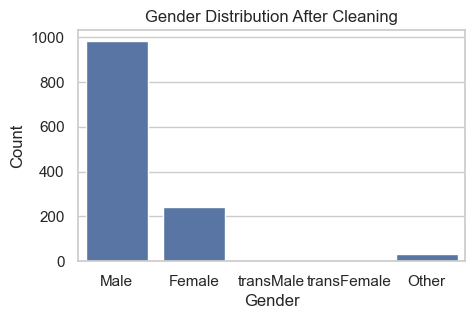

In [332]:
visualize_gender_distribution(df)

Figure 1 shows that males are in the majority, with close to 1,000 individuals. There are significantly fewer females, about 200. There are very few cross-male, cross-female and other gender entries.

**Figure 2**

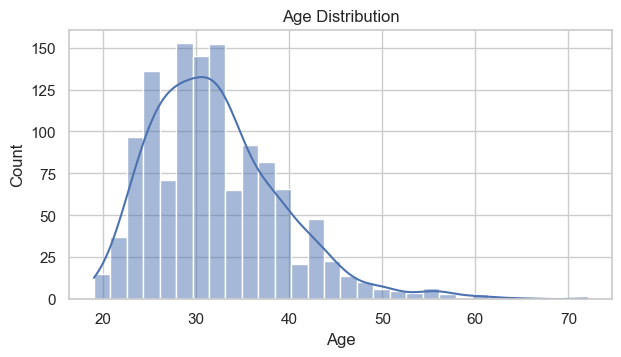

In [333]:
visualize_age_distribution(df)

Figure 2 shows that the majority of individuals are between the ages of 20 and 40, with a positively skewed distribution (right tail). The peak occurs around the age of 30, with nearly 150 individuals, and the number of individuals decreases with age. there are very few individuals over the age of 60, indicating that the dataset consists mainly of young and middle-aged individuals.

**Figure 3**

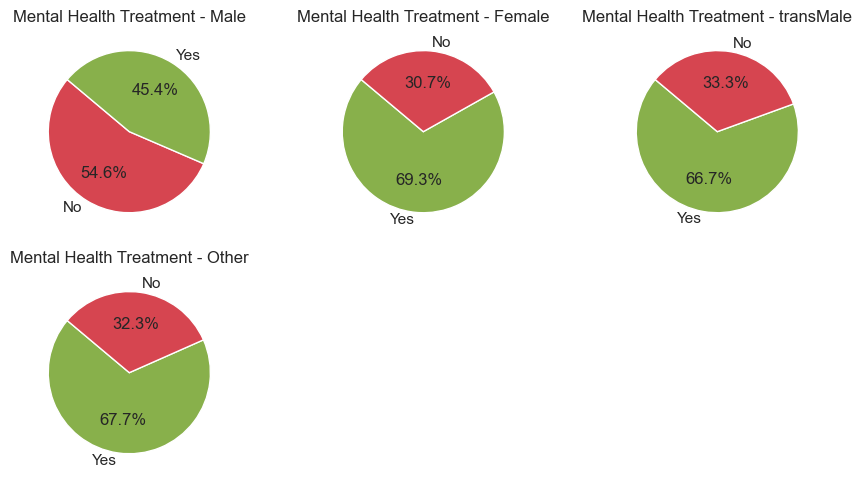

In [334]:
visualize_pie_charts_by_gender(df, color_dict)

Figure 3 shows a higher proportion of women and transgender people seeking mental health treatment than men, and a relatively low proportion of men seeking mental health treatment.

**Figure 4**

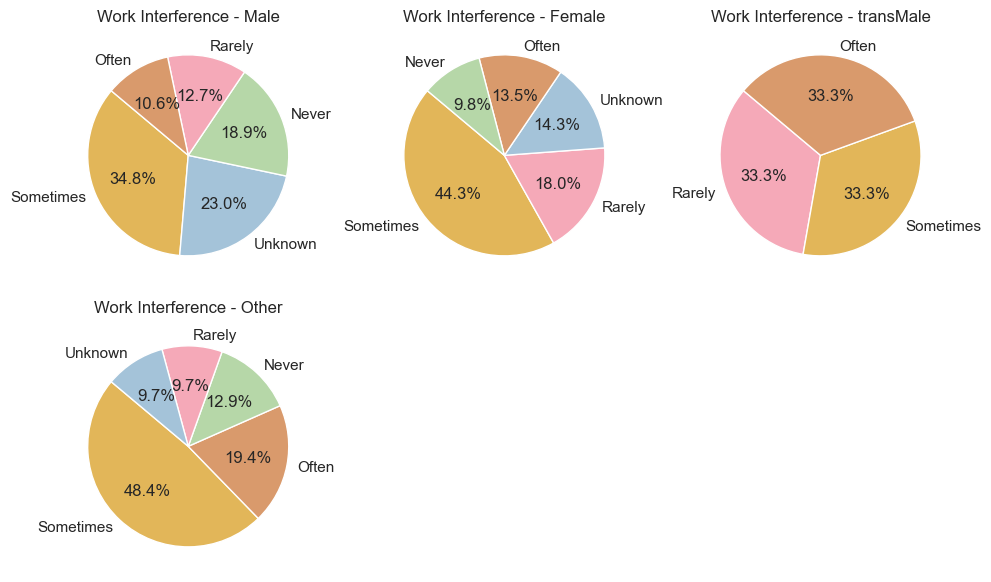

In [335]:
visualize_work_interference(df, color_dict)

Figure 4 reveals differences between genders in how mental health problems interfere with work. Among women, “never” (9.8%) is the least common, suggesting that women are less likely to report no interference at all. “Often” was 13.5%, slightly higher than for men.

**Figure 5**

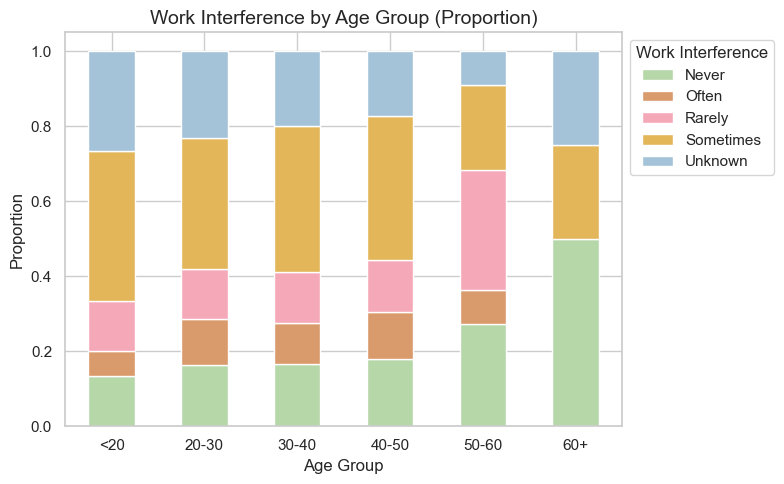

In [336]:
visualize_age_group_distribution(df, bins, labels, color_dict)

Figure 5 shows some differences in mental health status in relation to work disruptions between age groups, with older people(60+) appearing to experience fewer disruptions and younger and middle-aged groups(20-40) experiencing a higher proportion of disruptions.

**Figure 6**

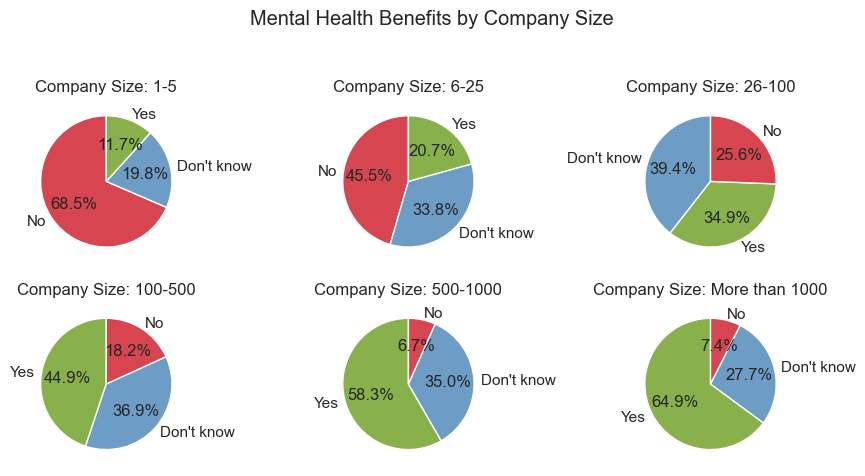

In [337]:
visualize_company_size_vs_benefits(df, employee_order, color_dict)

Figure 6 shows the distribution of responses from employees at companies of different sizes about whether their employer offers mental health benefits. The likelihood of an employer offering mental health benefits increases significantly as the size of the company increases, especially at companies with more than 500 employees. In contrast, employees at smaller companies (1-25 employees) are more likely to say that mental health benefits are not available or are unsure if they are available.

**Figure 7**

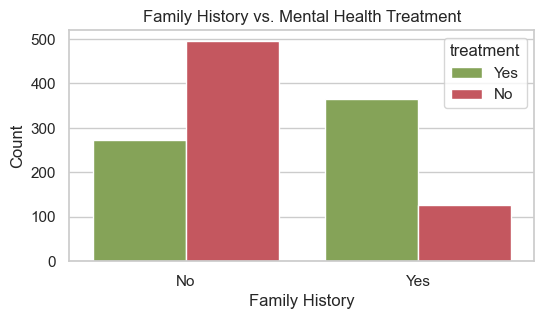

In [338]:
visualize_family_history_vs_treatment(df, color_dict)

Figure 7 shows that individuals with a family history of mental health problems are much more likely to seek mental health treatment, while those without a family history are much less likely to seek mental health treatment. This suggests that having a family history may be an important factor in treatment-seeking behavior.

**Figure 8**

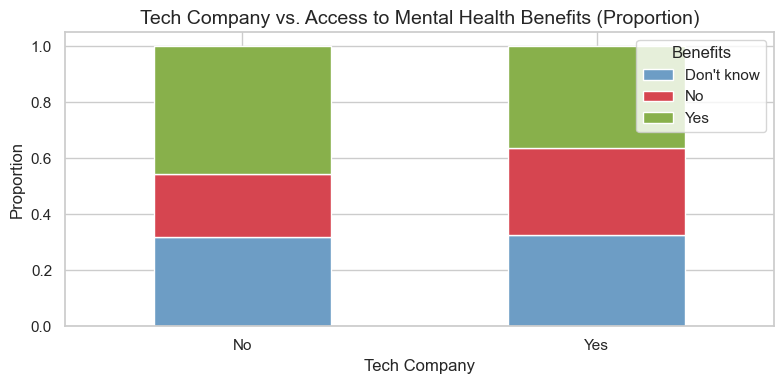

In [339]:
visualize_tech_vs_benefits(df, color_dict)

Figure 8 demonstrates that a higher percentage of tech companies offer mental health benefits compared to non-tech companies. Apparently tech companies offer more mental health benefits. In both types of companies, about 25% of employees are unsure about the availability of mental health benefits.

## Objective 3

Encode data and scale feature. Train and evaluate classification models, e.g. Decision Tree and KNN - to predict whether an employee are likely to seek mental health treatment based on specific features. The evaluation stage involves analysing the model's accuracy, recall, and precision to determine its effectiveness.

### Explanation of Results

The aim of this section is to train a machine learning model to predict whether an employee in a company needs mental health treatment. 

To build this model, we first encoded and scaled the features of the preprocessed dataset. Then, we applied a Random Forest model to assess the importance of variables with respect to the treatment label. We found that the columns like "work_interfere," "family_history," "care_options," "Age,"  were significantly related to the treatment label.

Using these variables, we applied four supervised learning algorithms, including Decision Tree and K-Nearest Neighbors (KNN), and evaluated their performance using F1 scores. The Decision Tree model achieved an F1 score of 0.85, demonstrating a strong balance between identifying positive cases and minimizing false positives. The SVC model followed closely with an F1 score of 0.80, while both KNN and Logistic Regression scored below 0.75, indicating limited effectiveness in this task.

We then further evaluated the Decision Tree model on the test set, using accuracy, precision, and recall as metrics. The model achieved a recall of 0.93, showing strong capability in identifying employees who need mental health treatment. An accuracy of 0.77 suggested a moderate rate of false positives, while a precision of 0.82 reflected above-average reliability.  Overall, these results indicate that the model has good performance in the current task.


### Visualisation

**Figure 7**

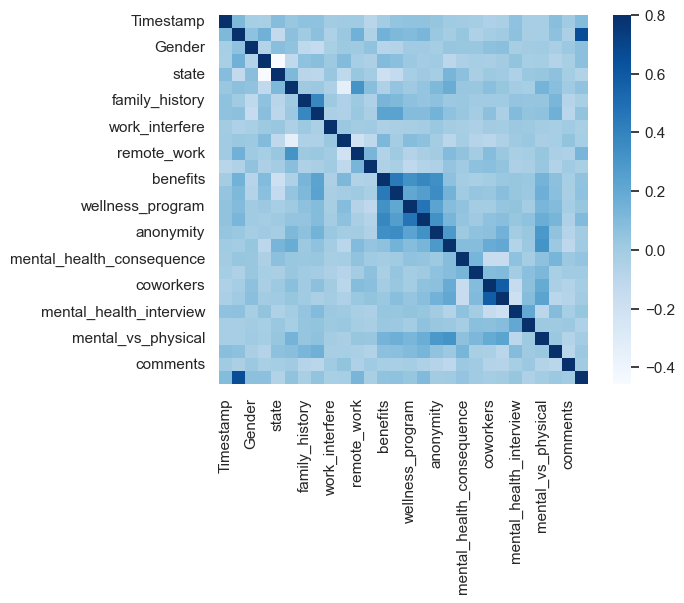

In [340]:
visualize_coefficient_matrix()

Figure 7 shows a heat map that demonstrate the correlation between different variables.

**Figure 8:**

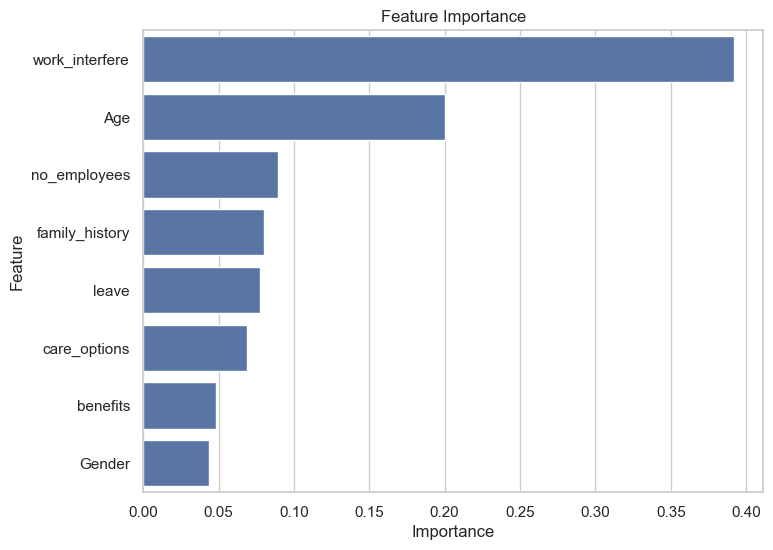

In [341]:
visualize_feature_importance()

Figure 8 shows a bar chart of feature importance. We selected the top 8 important variables to train the machine learning models.

**Figure 9**

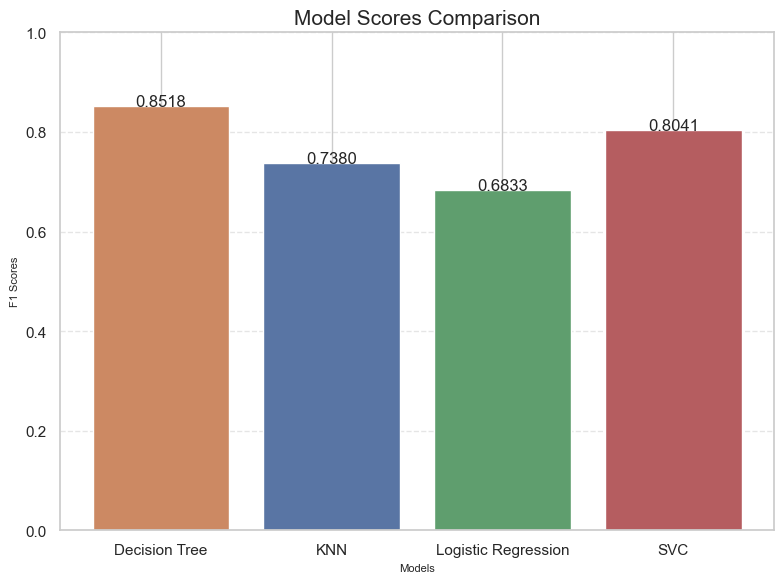

In [342]:
visualize_model_scores()

Figure 9 shows the F1 scores of different models.
From plot we can observe that the Decision Tree Model has highest F1 scores, showing a strong balance between identifying positive cases and minimizing false positives.

**Figure 10**

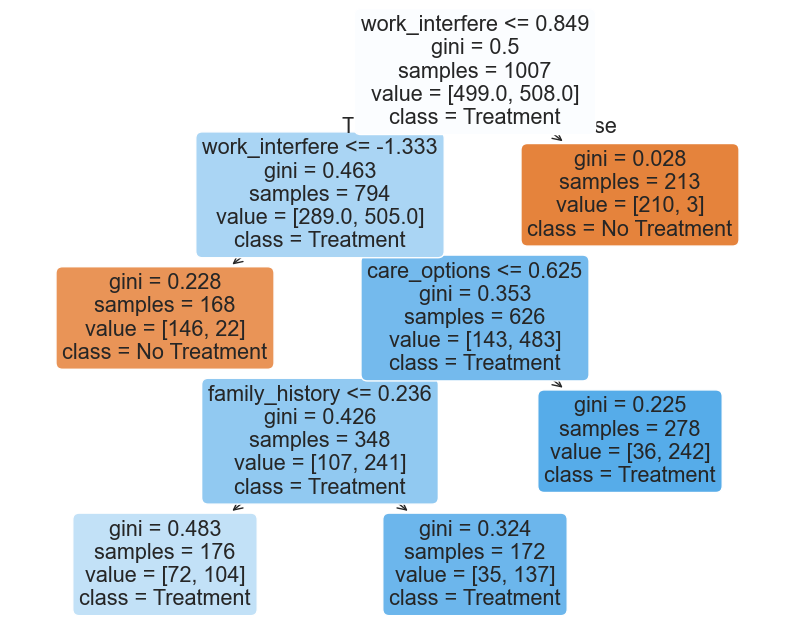

In [343]:
visualize_decision_tree()

Figure 10 shows the visualization of the decision tree. It can be observed from the figure that work_interfere is the main basis for division, which is consistent with the feature importance data calculated by random forest model. Most of the leaf nodes have low Gini coefficients, indicating that the decision tree has a high classification ability on the training set.

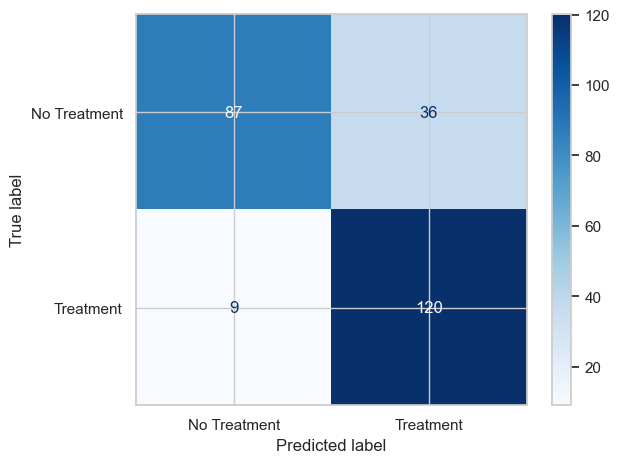

In [344]:
visualize_confusing_matrix()

Figure 11 demonstrates a confusion matrix of Decision Tree model. The recall = TP/(TP + FN) = 0.93, this shows that the model has a strong ability to identify employees who need mental treatment. The precision = TP/(TP + FP) = 0.77, which indicates that there is a certain amount of false positives when predicting Treatment. The overall model accuracy = (TP + TN)/ Total number of samples = 0.82.

**Figure 12**

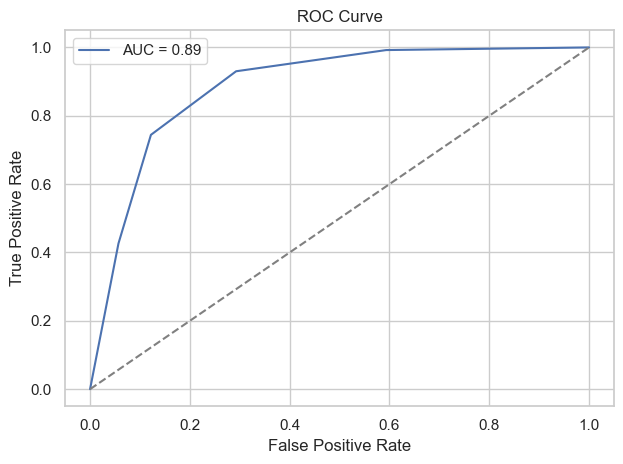

In [345]:
visualize_roc_curve()

Figure 12 illustrates the ROC curve of Decision Tree model. The ROC curve is far from the diagonal line (the performance of random guessing) and performs well in the high TPR and low FPR areas, showing that the model can effectively distinguish the two categories. The AUC is 0.89, indicating that the model has strong classification ability.

## Objective 4 
### Explanation of Results

200-400 Words

### Visualisation

# Conclusion

_Your concluding section should be around 200-400 words. It is recommended
that you divide it into the following sections._

### Achievements
_As we had expected, the most popular fridge magnets were of the 'meme' kind.
We were surprised that 'smiley' fridge magnets were less common than expected.
We conjecture that this is because, although they are apparently very popular,
few fridges display more than one smiley. However, 'meme' based magnets can
be found in large numbers, even on quite small fridges._

### Limitations

_The project was limited to a small number of fridge magents, which may not be
typical of fridges found in the global fridge magnet ecosystem._

### References

Bauhoff, S. 2023. Self-Report Bias in Estimating Cross-sectional and Treatment Effects. Springer eBooks., pp.6277–6279.

Cher, H. 2024. [Product Update] New Usability Rating User Experience | Kaggle. Kaggle.com. [Online]. [Accessed 26 November 2024]. Available from: https://www.kaggle.com/discussions/product-feedback/372061.

‌globalEdge. 2018. International Journal of Psychology. International Journal of Psychology.

‌
### Future Work

_In future work we would like to obtain more diverse data and study fridge magnets 
beyond the limited confines of student accomodation. We hypothesise that there
could be a link between fridge magnet types and social class and/or educational
achievement._